In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib as plt
from pandas import concat

In [4]:
# !pip install <package_name>
# !pwd
# !ls
gold_data1=pd.read_excel('/content/Dataset1.xlsx',sheet_name=1)

In [5]:
gold_data1.head()
# gold_data1.describe()

,Date,GCD,FTSE100,S&P500,DJ,HG_price,PL_price,SI_price,CL_price,DXY,FED_FUND,SOY
0,2000-01-31,283.30,6268.54,1394.46,10940.53,0.8495,455.0,5.2600,27.65,105.03,5.87,5.0800
1,2000-02-29,293.65,6232.56,1366.42,10128.31,0.7958,471.7,5.0950,30.57,106.01,5.85,5.0905
2,2000-03-31,276.75,6540.22,1498.58,10921.92,0.8050,489.6,4.9350,26.86,105.43,6.17,5.4550
3,2000-04-30,275.05,6327.43,1452.43,10733.91,0.7948,498.7,4.9375,25.71,109.95,6.06,5.3670
4,2000-05-31,272.25,6359.35,1420.60,10522.33,0.8145,539.4,4.9000,29.03,108.74,6.83,5.1750


In [6]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt




Text(0, 0.5, 'Gold value')

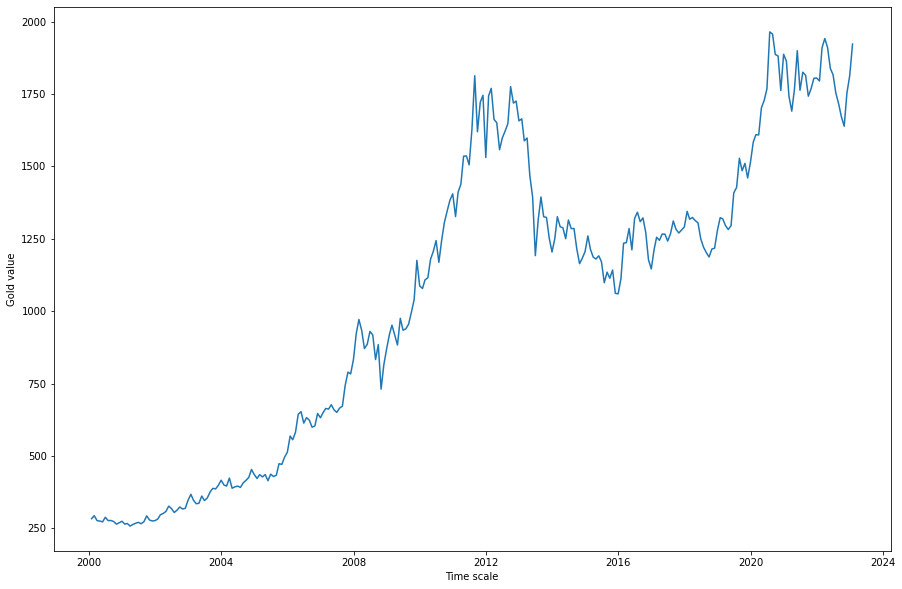

In [8]:
plt.figure(figsize=(15,10))
plt.plot(gold_data1['Date'],gold_data1['GCD'])

plt.xlabel("Time scale")
plt.ylabel("Gold value")

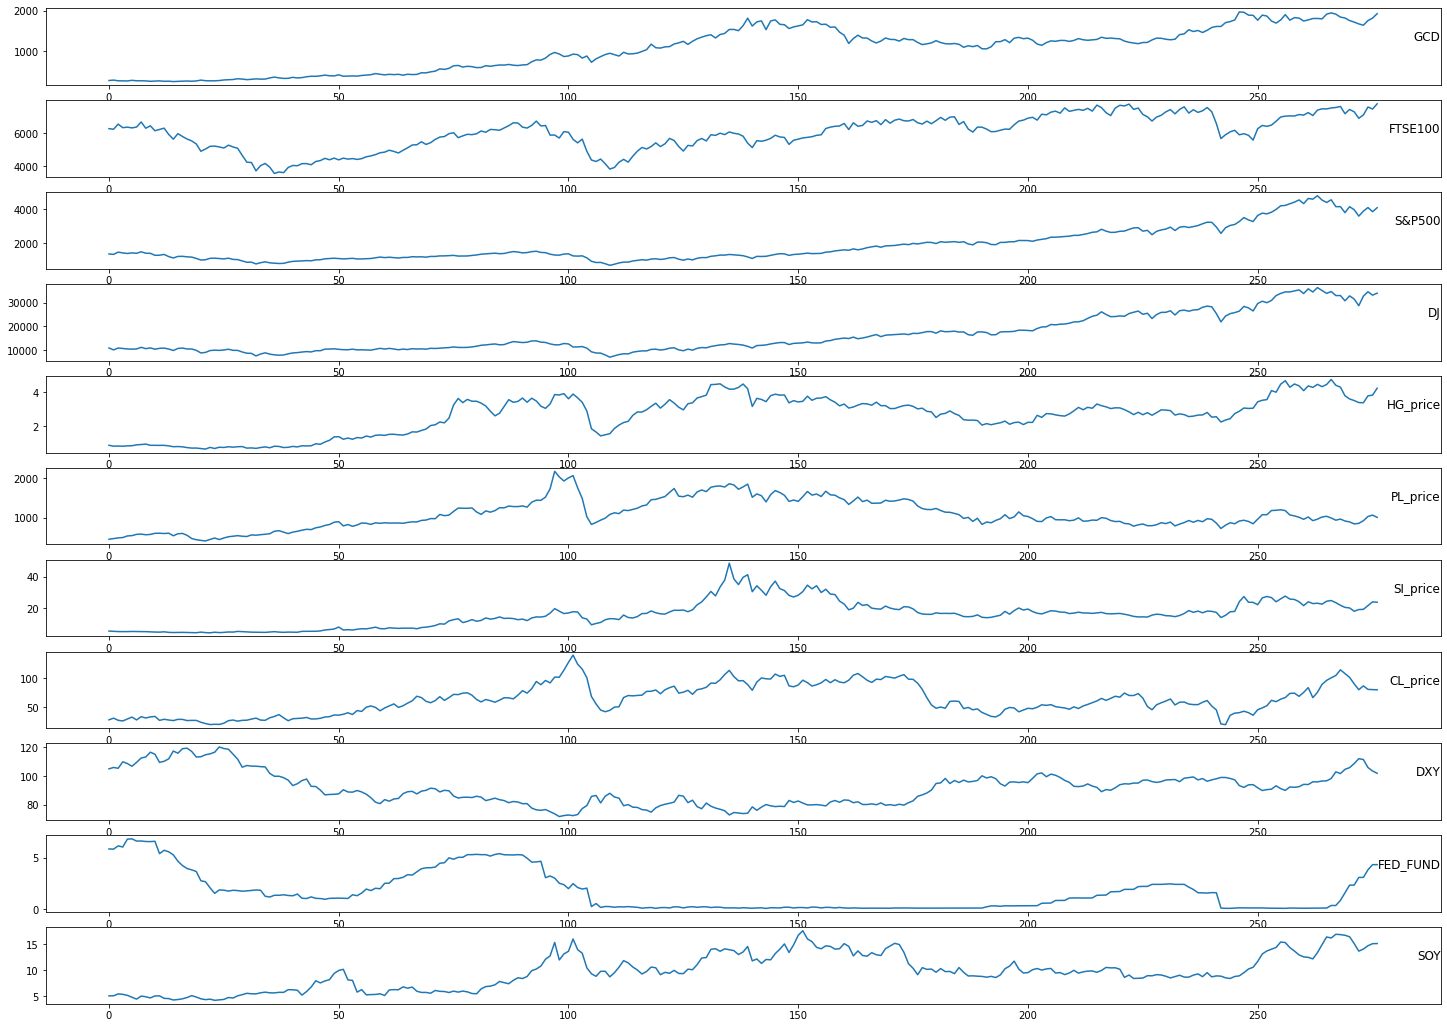

In [7]:
plt.figure(figsize=(25,20))
i=1
for column in gold_data1.columns[1:]:
    plt.subplot(len(gold_data1.columns), 1, i)
    plt.plot(gold_data1[column].values)
    plt.title(column, y=0.5, loc='right')
    i += 1
plt.show()

In [8]:
print(gold_data1.corr(method="spearman"))

               GCD   FTSE100    S&P500        DJ  HG_price  PL_price  \
GCD       1.000000  0.544298  0.688177  0.769618  0.760284  0.509979   
FTSE100   0.544298  1.000000  0.912649  0.888204  0.440380  0.111992   
S&P500    0.688177  0.912649  1.000000  0.981534  0.469006  0.071696   
DJ        0.769618  0.888204  0.981534  1.000000  0.560243  0.179518   
HG_price  0.760284  0.440380  0.469006  0.560243  1.000000  0.787925   
PL_price  0.509979  0.111992  0.071696  0.179518  0.787925  1.000000   
SI_price  0.925120  0.444779  0.528435  0.621095  0.843162  0.731295   
CL_price  0.570247  0.293713  0.227750  0.323089  0.847270  0.833328   
DXY      -0.237264  0.218609  0.237180  0.132319 -0.565062 -0.827684   
FED_FUND -0.603004 -0.060467 -0.193736 -0.274211 -0.378839 -0.439345   
SOY       0.805901  0.369978  0.429595  0.524545  0.809786  0.720298   

          SI_price  CL_price       DXY  FED_FUND       SOY  
GCD       0.925120  0.570247 -0.237264 -0.603004  0.805901  
FTSE100   0.4

In [10]:
g=gold_data1.set_index('Date')
df2=np.log(g/g.shift())
df2.head()

,GCD,FTSE100,S&P500,DJ,HG_price,PL_price,SI_price,CL_price,DXY,FED_FUND,SOY
Date,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,0.035882,-0.005756,-0.020313,-0.077140,-0.065300,0.036046,-0.031871,0.100393,0.009287,-0.003413,0.002065
2000-03-31,-0.059274,0.048184,0.092324,0.075437,0.011494,0.037246,-0.031907,-0.129381,-0.005486,0.053257,0.069157
2000-04-30,-0.006162,-0.033077,-0.031280,-0.017364,-0.012752,0.018416,0.000506,-0.043758,0.041978,-0.017989,-0.016264
2000-05-31,-0.010232,0.005032,-0.022159,-0.019908,0.024484,0.078453,-0.007624,0.121450,-0.011066,0.119615,-0.036430


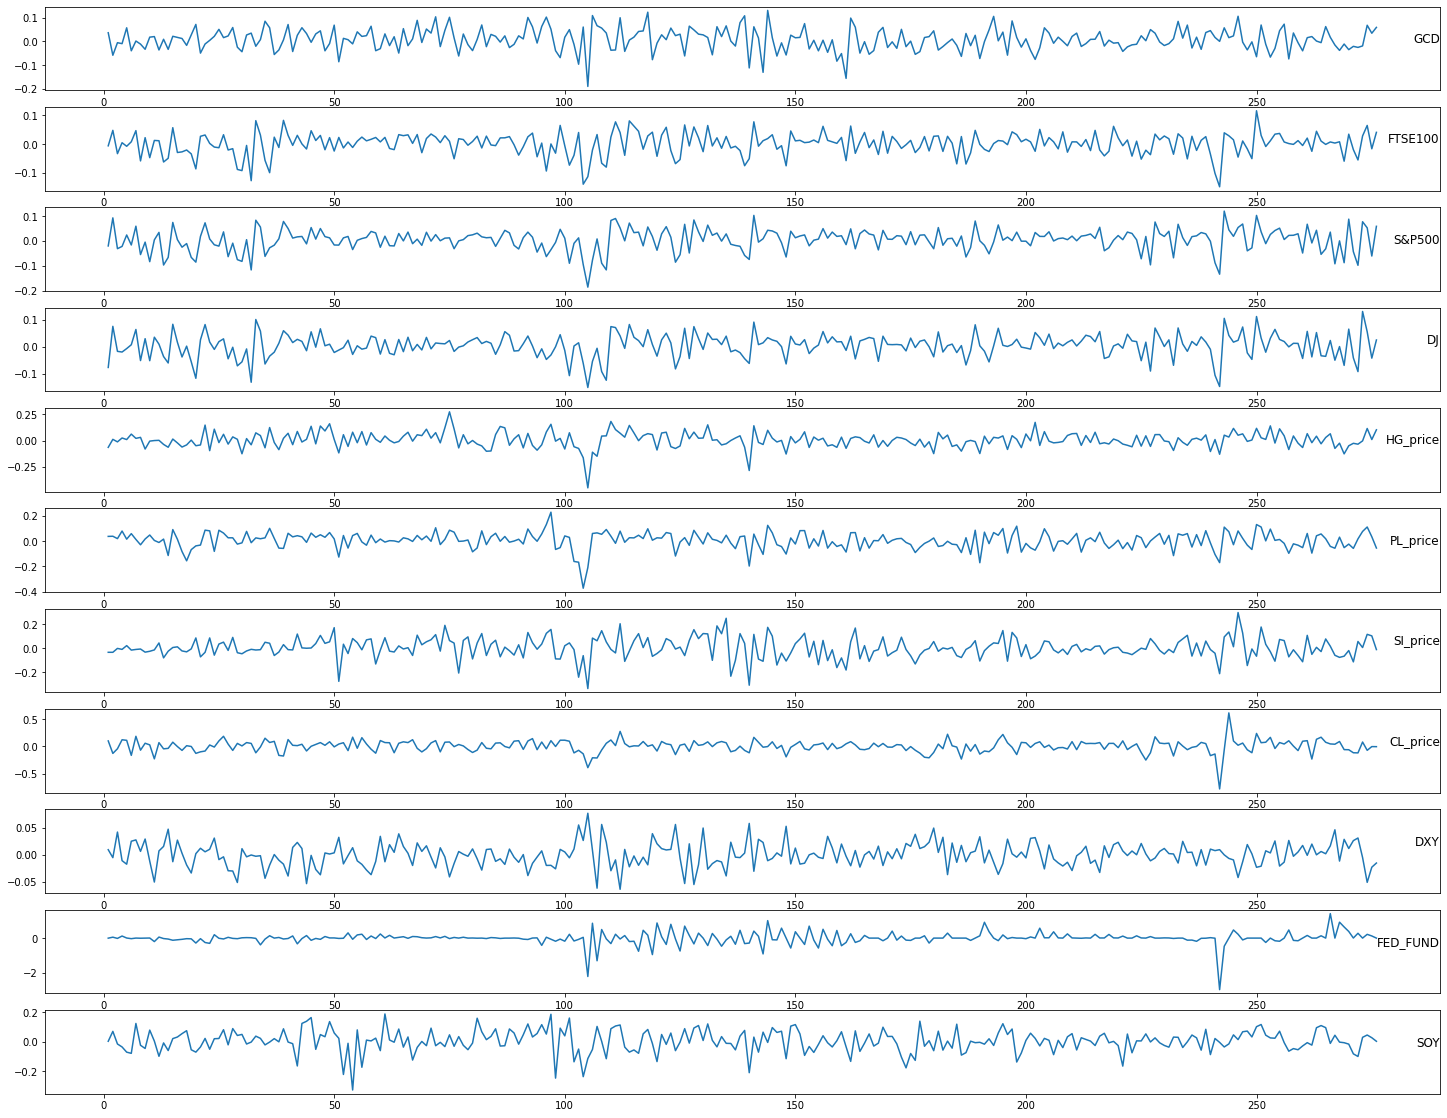

In [11]:
plt.figure(figsize=(25,20))
i=1
for column in df2.columns[0:]:
    plt.subplot(len(df2.columns), 1, i)
    plt.plot(df2[column].values)
    plt.title(column, y=0.5, loc='right')
    i += 1
plt.show()

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU
from tensorflow import keras


In [13]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder


In [14]:
# convert series to supervised learning
def series_to_supervised(data, n_in, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
 # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        # print(cols)
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
             names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
             names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

 # put it all together

    agg = concat(cols, axis=1)
    print(agg.shape)
    agg.columns = names
 # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
# print(scaled.shape)
# reframed = series_to_supervised(scaled, 2, 1)
# print(reframed.head)

In [15]:
callTimes = {"Age": [10,20,30,40,50],
             "Call Duration":[1,4,8,2,5]};
df2 = pd.DataFrame(data=callTimes)
cols, names = list(), list()
for i in range(3, 0, -1):
        cols.append(df2.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(2)]
for i in range(0, 1):
        cols.append(df2.shift(-i))
        if i == 0:
             names += [('var%d(t)' % (j+1)) for j in range(2)]
        else:
             names += [('var%d(t+%d)' % (j+1, i)) for j in range(2)]
agg = concat(cols, axis=1)
agg.columns = names 
agg 

,var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
0,NaN,NaN,NaN,NaN,NaN,NaN,10,1
1,NaN,NaN,NaN,NaN,10.0,1.0,20,4
2,NaN,NaN,10.0,1.0,20.0,4.0,30,8
3,10.0,1.0,20.0,4.0,30.0,8.0,40,2
4,20.0,4.0,30.0,8.0,40.0,2.0,50,5


In [15]:
dataset = pd.read_excel('/content/Dataset1.xlsx',sheet_name=1,header=0, index_col=0)


In [16]:
dataset.columns

Index(['GCD', 'FTSE100', 'S&P500', 'DJ', 'HG_price', 'PL_price', 'SI_price',
       'CL_price', 'DXY', 'FED_FUND', 'SOY'],
      dtype='object')

In [17]:
dataset1=dataset.drop(['FTSE100','S&P500','PL_price','HG_price','CL_price','DXY'],axis=1)

In [18]:
dataset1.head()
dataset1.shape

(277, 5)

In [19]:
values = dataset1.values

In [20]:
print(values.shape)

(277, 5)


In [21]:
values

array([[2.833000e+02, 1.094053e+04, 5.260000e+00, 5.870000e+00,
        5.080000e+00],
       [2.936500e+02, 1.012831e+04, 5.095000e+00, 5.850000e+00,
        5.090500e+00],
       [2.767500e+02, 1.092192e+04, 4.935000e+00, 6.170000e+00,
        5.455000e+00],
       ...,
       [1.753500e+03, 3.458977e+04, 2.156000e+01, 3.830000e+00,
        1.470000e+01],
       [1.813750e+03, 3.314725e+04, 2.394500e+01, 4.330000e+00,
        1.509000e+01],
       [1.923050e+03, 3.397808e+04, 2.372500e+01, 4.330000e+00,
        1.512000e+01]])

In [22]:
values = values.astype('float32')

In [23]:
print(values.shape)

(277, 5)


In [24]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [25]:
print(scaled.shape)

(277, 5)


In [30]:
reframed = series_to_supervised(scaled, 1, 1)

(277, 10)


In [31]:
print(reframed.shape)

(276, 10)


In [32]:
type(reframed)

pandas.core.frame.DataFrame

In [33]:
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)   var2(t)  \
1   0.014995   0.132453   0.025135   0.854839   0.064366  0.021058  0.104708   
2   0.021058   0.104708   0.021432   0.851906   0.065152  0.011159  0.131817   
3   0.011159   0.131817   0.017841   0.898827   0.092433  0.010163  0.125395   
4   0.010163   0.125395   0.017897   0.882698   0.085847  0.008523  0.118168   
5   0.008523   0.118168   0.017056   0.995601   0.071477  0.017836  0.115625   

    var3(t)   var4(t)   var5(t)  
1  0.021432  0.851906  0.065152  
2  0.017841  0.898827  0.092433  
3  0.017897  0.882698  0.085847  
4  0.017056  0.995601  0.071477  
5  0.019693  1.000000  0.044682  


In [34]:
# reframed.drop(reframed.columns[[13,14,15,16,17]], axis=1, inplace=True)
#

In [35]:
type(reframed)
# print(reframed2.values)

pandas.core.frame.DataFrame

In [36]:
print(reframed.head)

<bound method NDFrame.head of      var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)  \
1     0.014995   0.132453   0.025135   0.854839   0.064366  0.021058   
2     0.021058   0.104708   0.021432   0.851906   0.065152  0.011159   
3     0.011159   0.131817   0.017841   0.898827   0.092433  0.010163   
4     0.010163   0.125395   0.017897   0.882698   0.085847  0.008523   
5     0.008523   0.118168   0.017056   0.995601   0.071477  0.017836   
..         ...        ...        ...        ...        ...       ...   
272   0.854147   0.835088   0.309807   0.335777   0.815059  0.828286   
273   0.828286   0.739959   0.333932   0.445748   0.706534  0.809103   
274   0.809103   0.876847   0.337186   0.445748   0.736472  0.876172   
275   0.876172   0.940273   0.390934   0.555718   0.784372  0.911463   
276   0.911463   0.890999   0.444457   0.629032   0.813562  0.975486   

      var2(t)   var3(t)   var4(t)   var5(t)  
1    0.104708  0.021432  0.851906  0.065152  
2    0.131817

In [37]:
values = reframed.values

In [38]:
values.shape

(276, 10)

In [253]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# values = scaler.fit_transform(values)

In [39]:
values[0:5, : ]

array([[0.01499531, 0.13245265, 0.02513466, 0.85483867, 0.06436646,
        0.02105787, 0.10470848, 0.02143177, 0.8519061 , 0.06515232],
       [0.02105787, 0.10470848, 0.02143177, 0.8519061 , 0.06515232,
        0.01115862, 0.13181694, 0.01784112, 0.89882696, 0.09243321],
       [0.01115862, 0.13181694, 0.01784112, 0.89882696, 0.09243321,
        0.01016283, 0.12539484, 0.01789722, 0.8826979 , 0.0858469 ],
       [0.01016283, 0.12539484, 0.01789722, 0.8826979 , 0.0858469 ,
        0.00852272, 0.11816759, 0.01705566, 0.9956012 , 0.07147673],
       [0.00852272, 0.11816759, 0.01705566, 0.9956012 , 0.07147673,
        0.01783621, 0.11562483, 0.01969255, 1.        , 0.04468229]],
      dtype=float32)

In [40]:
# split into train and test sets
n_train_months = 21 * 12
train = values[:n_train_months, :]
test = values[n_train_months:, :]

In [41]:
nmonth=1
n_features=5
n_obs = nmonth * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

(252, 5) 252 (252,)


In [42]:
train_X = train_X.reshape((train_X.shape[0], nmonth, n_features))
test_X = test_X.reshape((test_X.shape[0], nmonth, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(252, 1, 5) (252,) (24, 1, 5) (24,)


In [235]:
# split into input and outputs
# train_X, train_y = train[:, :-1], train[:, -1]
# test_X, test_y = test[:, :-1], test[:, -1]
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(252, 12) (252,) (23, 12) (23,)


In [236]:
# temp =[]

# lstmon=2
# # Pull hours into the three dimensional feild
# for i in range(len(train_X) - lstmon):
#     temp.append(train_X[i:i+lstmon,:])
    
# train_X = np.array(temp) #Export Train Features

# temp= []
# # Pull hours into the three dimensional feild
# for i in range(len(test_X) - lstmon):
#     temp.append(test_X[i:i+lstmon,:])
# test_X = np.array(temp)
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(250, 2, 12) (252,) (21, 2, 12) (23,)


In [223]:
# reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((1, train_X.shape[0], train_X.shape[1]))
# test_X = test_X.reshape((1, test_X.shape[0], test_X.shape[1]))
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1, 252, 12) (252,) (1, 23, 12) (23,)


In [45]:
# design network
# learning_rate=0.001
model = Sequential()
model.add(LSTM(15,input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1,kernel_regularizer='l1_l2'))
model.add(LeakyReLU(alpha=0.5))
adam=keras.optimizers.Adam(learning_rate=0.005)
# callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss='mae', optimizer='adam')


Epoch 1/50
51/51 - 2s - loss: 0.3906 - val_loss: 0.6773 - 2s/epoch - 44ms/step
Epoch 2/50
51/51 - 0s - loss: 0.2890 - val_loss: 0.4436 - 105ms/epoch - 2ms/step
Epoch 3/50
51/51 - 0s - loss: 0.2138 - val_loss: 0.1977 - 118ms/epoch - 2ms/step
Epoch 4/50
51/51 - 0s - loss: 0.1641 - val_loss: 0.0910 - 116ms/epoch - 2ms/step
Epoch 5/50
51/51 - 0s - loss: 0.1499 - val_loss: 0.0968 - 114ms/epoch - 2ms/step
Epoch 6/50
51/51 - 0s - loss: 0.1357 - val_loss: 0.1011 - 118ms/epoch - 2ms/step
Epoch 7/50
51/51 - 0s - loss: 0.1164 - val_loss: 0.1189 - 130ms/epoch - 3ms/step
Epoch 8/50
51/51 - 0s - loss: 0.1084 - val_loss: 0.1118 - 112ms/epoch - 2ms/step
Epoch 9/50
51/51 - 0s - loss: 0.1040 - val_loss: 0.1014 - 113ms/epoch - 2ms/step
Epoch 10/50
51/51 - 0s - loss: 0.1003 - val_loss: 0.1018 - 111ms/epoch - 2ms/step
Epoch 11/50
51/51 - 0s - loss: 0.0979 - val_loss: 0.0972 - 120ms/epoch - 2ms/step
Epoch 12/50
51/51 - 0s - loss: 0.0951 - val_loss: 0.0995 - 110ms/epoch - 2ms/step
Epoch 13/50
51/51 - 0s - lo

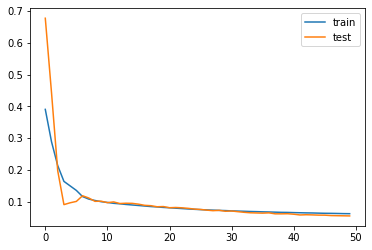

In [46]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=5, validation_data=(test_X, test_y),verbose=2, shuffle=False) #, callbacks=[callback]
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [47]:
# make a prediction
yhat = model.predict(test_X)
# yhat



1/1 [==============================] - 0s 313ms/step


In [310]:
print(yhat.shape)

(24, 1)


In [210]:
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [48]:
test_X = test_X.reshape((test_X.shape[0], nmonth*n_features))

In [217]:
print(test_X.shape)

(24, 5)


In [49]:
from math import sqrt
from numpy import concatenate

In [50]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -4:]), axis=1)
# print(inv_yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)
# print(values1.shape)
inv_yhat = inv_yhat[:,0]
inv_yhat

array([1831.218 , 1785.188 , 1757.2009, 1828.6451, 1906.7262, 1824.0077,
       1846.5422, 1824.8575, 1745.7537, 1805.9016, 1791.6727, 1824.2117,
       1812.7562, 1878.2568, 1902.8934, 1863.6527, 1815.1101, 1764.8112,
       1752.2642, 1683.5636, 1628.5802, 1665.2153, 1771.6244, 1811.5801],
      dtype=float32)

In [213]:
# # invert scaling for forecast
# concatenate((yhat, test_X[:, 0:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# # print(values1.shape)
# inv_yhat = inv_yhat[:,0]
# inv_yhat



array([2033.1995, 2027.9578, 2048.3496, 2089.1296, 2102.4548, 2106.5173,
       2132.4658, 2120.224 , 2115.632 , 2138.2156, 2137.1582, 2123.5327,
       2093.2322, 2095.522 , 2077.209 , 2028.0055, 1989.319 , 1959.8693,
       1961.2826, 1909.3379, 1893.226 , 1948.0621, 1973.5266],
      dtype=float32)

In [ ]:
# # print(values2.shape)

# # scaler=MinMaxScaler(feature_range=(0, 1))
# invval2 = scaler.inverse_transform(values2[:,0:11])


# # print(invval2.shape)
# invval2[:,0]


# print(values.shape)

In [280]:
inv_yhat.shape

(24,)

In [ ]:
# train_y = train_y.reshape((len(train_y), 1))
# # print(train_y.shape)
# # print(train_X.shape)
# # train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
# print(train_X.shape)
# inv_y2 = concatenate((train_y, train_X[:, 1:]), axis=1)
# inv_y2 = scaler.inverse_transform(inv_y2)
# inv_y2 = inv_y2[:,0]
# inv_y2

(216, 11)


array([1813.75   , 1753.5    , 1639.     , 1671.75   , 1715.9    ,
       1753.4001 , 1816.9999 , 1838.7    , 1911.3    , 1942.15   ,
       1909.85   , 1795.25   , 1805.85   , 1804.3999 , 1769.15   ,
       1742.8    , 1814.85   , 1825.75   , 1763.15   , 1899.95   ,
       1767.65   , 1691.05   , 1742.85   , 1863.8    , 1887.6    ,
       1762.5502 , 1881.8501 , 1886.9    , 1957.35   , 1964.9001 ,
       1768.1    , 1728.7001 , 1702.75   , 1608.95   , 1609.85   ,
       1584.2    , 1514.75   , 1460.15   , 1510.95   , 1485.3    ,
       1528.4    , 1427.55   , 1409.     , 1295.55   , 1282.3    ,
       1295.4    , 1319.15   , 1323.25   , 1279.     , 1217.55   ,
       1214.95   , 1187.25   , 1202.45   , 1220.95   , 1250.45   ,
       1305.35   , 1313.2    , 1323.85   , 1317.85   , 1345.05   ,
       1291.     , 1280.2    , 1270.15   , 1283.1    , 1311.75   ,
       1267.55   , 1242.25   , 1266.2    , 1266.45   , 1244.85   ,
       1255.6    , 1212.8    , 1145.9    , 1178.1    , 1272.  

In [51]:
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y

array([1742.85  , 1691.05  , 1767.65  , 1899.95  , 1763.15  , 1825.75  ,
       1814.85  , 1742.8   , 1769.15  , 1804.3999, 1805.85  , 1795.25  ,
       1909.85  , 1942.15  , 1911.3   , 1838.7   , 1816.9999, 1753.4001,
       1715.9   , 1671.75  , 1639.    , 1753.5   , 1813.75  , 1923.05  ],
      dtype=float32)

In [216]:
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 0:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# inv_y

array([1691.05  , 1767.65  , 1899.95  , 1763.15  , 1825.75  , 1814.85  ,
       1742.8   , 1769.15  , 1804.3999, 1805.85  , 1795.25  , 1909.85  ,
       1942.15  , 1911.3   , 1838.7   , 1816.9999, 1753.4001, 1715.9   ,
       1671.75  , 1639.    , 1753.5   , 1813.75  , 1923.05  ],
      dtype=float32)

In [490]:
inv_y.shape

(23,)

In [52]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 61.139


<ipython-input-72-b90167373246>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predicted'] = inv_yhat


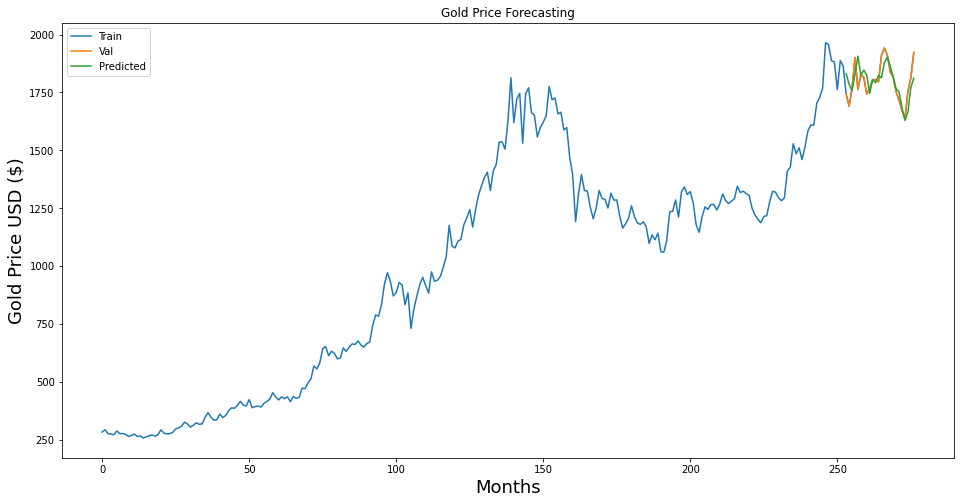

In [72]:
#Plotting the graph for the forecasting model

valid = gold_data1[n_train_months+1:]
# df_sales_pred = pd.merge(train,valid,on='date',how='left')
valid['Predicted'] = inv_yhat
#Visualize the data
plt.figure(figsize=(16,8))
plt.plot(gold_data1['GCD'])
# plt.plot(valid.loc[:, ('GCD', 'Predicted')])
plt.plot(valid[['GCD','Predicted']])
plt.legend(['Train','Val', 'Predicted'], loc ='upper left')
plt.title('Gold Price Forecasting')
plt.xlabel('Months', fontsize=18)
plt.ylabel('Gold Price USD ($)', fontsize=18)
plt.show()

# New section